In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load your CSV Files

customers = pd.read_csv("Data/customers_cleaned.csv", parse_dates=["signup_date"])
orders = pd.read_csv("Data/orders_cleaned.csv", parse_dates=["order_date"])
order_items = pd.read_csv("Data/order_items_cleaned.csv")
products = pd.read_csv("Data/products_cleaned.csv")
inventory = pd.read_csv("Data/inventory_cleaned.csv", parse_dates=["last_updated"])


In [17]:
data = (
    order_items
    .merge(orders, on="order_id")
    .merge(products, on="product_id")
)


In [18]:
data.shape

(148295, 15)

In [19]:
data.head()

,order_item_id,order_id,product_id,quantity,unit_price,customer_id,order_date,status,payment_method,region,product_name,category,sub_category,cost,price
0,1,1,710,2,271.79,4506,2023-01-04,Cancelled,Credit Card,Gulf,Product_710,Home,Kitchen,122.65,271.79
1,2,1,780,3,296.09,4506,2023-01-04,Cancelled,Credit Card,Gulf,Product_780,Fashion,Women,139.48,296.09
2,3,2,414,2,332.99,2881,2023-07-18,Completed,Cash,Levant,Product_414,Fashion,Men,137.10,332.99
3,4,2,236,5,30.91,2881,2023-07-18,Completed,Cash,Levant,Product_236,Fashion,Men,13.76,30.91
4,5,3,147,5,13.68,7248,2023-12-17,Completed,Cash,North Africa,Product_147,Home,Kitchen,10.95,13.68


In [20]:
data["revenue"] = data["quantity"] * data["unit_price"]


In [21]:
data = data[data["status"] == "Completed"]

In [22]:
data.shape

(126297, 16)

Monthly Sales Trend (Line Chart)

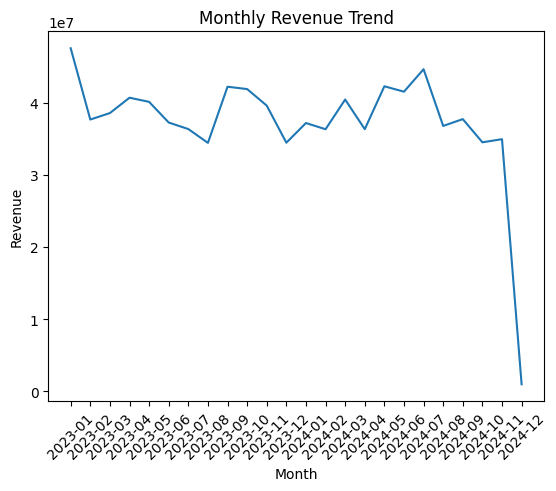

In [23]:
monthly_sales = (
    data
    .groupby(data["order_date"].dt.to_period("M"))["revenue"]
    .sum()
    .reset_index()
)

monthly_sales["order_date"] = monthly_sales["order_date"].astype(str)

plt.plot(monthly_sales["order_date"], monthly_sales["revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()
